In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [3]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [4]:
# System
import os

# Time
import time
import datetime

# Numerical
import numpy as np
import pandas as pd

# NLP
import string
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize 
from nltk.stem import SnowballStemmer
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
# from pywsd.utils import lemmatize_sentence
from gensim.models import Word2Vec

# Preprocessing
from sklearn import preprocessing
from sklearn.utils import class_weight as cw
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from bs4 import BeautifulSoup

# Model Selection
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

# Machine Learning Models
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, BaggingClassifier, ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier

# Evaluation Metrics
from sklearn import metrics 
from sklearn.metrics import f1_score, accuracy_score,confusion_matrix,classification_report

# Deep Learing Preprocessing - Keras
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.utils import to_categorical

# Deep Learning Model - Keras
from keras.models import Model
from keras.models import Sequential
from keras.utils import plot_model
# Deep Learning Model - Keras - CNN
from keras.layers import Conv1D, Conv2D, Convolution1D, MaxPooling1D, SeparableConv1D, SpatialDropout1D, \
    GlobalAvgPool1D, GlobalMaxPool1D, GlobalMaxPooling1D 
from keras.layers.pooling import _GlobalPooling1D
from keras.layers import MaxPooling2D, GlobalMaxPooling2D, GlobalAveragePooling2D
from keras.layers import Embedding
from keras.layers import Input, Add, concatenate, Dense, Activation, BatchNormalization, Dropout, Flatten
from keras.layers import LeakyReLU, PReLU, Lambda, Multiply
# Deep Learning Model - Keras - LSTM
from keras.preprocessing.sequence import pad_sequences
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import TimeDistributed
from keras.layers import Bidirectional


# Deep Learning Parameters - Keras
from keras.optimizers import RMSprop, Adam

# Deep Learning Callbacs - Keras
from keras.callbacks import ModelCheckpoint, EarlyStopping, TensorBoard, ReduceLROnPlateau
from keras.layers import MaxPooling3D, GlobalMaxPooling3D, GlobalAveragePooling3D
# Visualization


import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [5]:
books_neg = pd.read_csv("/content/drive/My Drive/LSTM/books_negative.csv")
books_pos = pd.read_csv("/content/drive/My Drive/LSTM/books_positive.csv")
dvd_neg = pd.read_csv("/content/drive/My Drive/LSTM/dvd_negative.csv")
dvd_pos = pd.read_csv("/content/drive/My Drive/LSTM/dvd_positive.csv")
ele_neg = pd.read_csv("/content/drive/My Drive/LSTM/electronics_negative.csv")
ele_pos = pd.read_csv("/content/drive/My Drive/LSTM/electronics_positive.csv")
kit_neg = pd.read_csv("/content/drive/My Drive/LSTM/kitchen_negative.csv")
kit_pos = pd.read_csv("/content/drive/My Drive/LSTM/kitchen_positive.csv")


In [6]:
books_neg['label'] = 0 
books_pos['label'] = 1
books = pd.concat([books_neg,books_pos],axis = 0)
books['domain'] = 'books'
dvd_neg['label'] = 0
dvd_pos['label'] = 1
dvd = pd.concat([dvd_pos, dvd_neg],axis = 0)
dvd['domain'] = 'dvd'
ele_neg['label'] = 0
ele_pos['label'] = 1
ele = pd.concat([ele_neg, ele_pos],axis = 0)
ele['domain'] = 'electronics'
kit_neg['label'] = 0
kit_pos['label'] = 1
kit = pd.concat([kit_neg, kit_pos],axis = 0)
kit['domain'] = 'kitchen'
alldata = pd.concat([books,dvd,ele,kit])

In [7]:
books =books.reset_index(drop=True)
dvd =dvd.reset_index(drop=True)
ele =ele.reset_index(drop=True)
kit =kit.reset_index(drop=True)

In [8]:
x_books = books['review_text']
y_books = books['label']

x_dvd = dvd['review_text']
y_dvd = dvd['label']

x_ele = ele['review_text']
y_ele = ele['label']

x_kit = kit['review_text']
y_kit = kit['label']

In [9]:
def clean_doc(doc):
    #split into words
    tokens = word_tokenize(doc)
    #convert to lower case
    tokens = [w.lower() for w in tokens]
    #prepare regex for char filtering
    re_punc =re.compile('[%s]'% re.escape(string.punctuation))
    #remove punctuation
    stripped =[re_punc.sub('',w) for w in tokens]
    #filter out stop words
    #stop_words = set(stopwords.words('english'))
    #words =[w for w in words if not w in stop_words]
    #remove remaining tokens that are not alphabetic
    words = [w for w in stripped if w.isalpha()]
    #filter out short tokens
    tokens = [word for word in words if len(word)>1]
    return tokens

In [10]:
text_books = []
for m in range(0,len(x_books)):
    X = ''.join(str(i)for i in x_books[m])
    te = clean_doc(X)
    trainx = " ".join(te)
    text_books.append(trainx)

text_dvd = []
for m in range(0,len(x_dvd)):
    X = ''.join(str(i)for i in x_dvd[m])
    te = clean_doc(X)
    trainx = " ".join(te)
    text_dvd.append(trainx)


text_ele = []
for m in range(0,len(x_ele)):
    X = ''.join(str(i)for i in x_ele[m])
    te = clean_doc(X)
    trainx = " ".join(te)
    text_ele.append(trainx)


text_kit = []
for m in range(0,len(x_kit)):
    X = ''.join(str(i)for i in x_kit[m])
    te = clean_doc(X)
    trainx = " ".join(te)
    text_kit.append(trainx)

In [11]:
#tokens
tokens_b = []
for m in range(0,len(x_books)):
    X = ''.join(str(i)for i in x_books[m])
    te = clean_doc(X)
    tokens_b.append(te)

In [12]:
#define the word2vec model
w2v_model_b = Word2Vec(tokens_b,min_count=1,size=100,workers=4)

In [13]:
#convert text data to vector
x_wv_b=[]
for i in range(len(tokens_b)): 
    vector=w2v_model_b.wv[tokens_b[i]]
    x_wv_b.append(vector)
    
X_wv_b=np.array(x_wv_b)

In [15]:
max_len = 120

In [16]:
# pad the vectors
X_wv_b_padded=pad_sequences(X_wv_b,  maxlen=max_len, padding='post')

In [17]:
tokens_d = []
for m in range(0,len(x_dvd)):
    X = ''.join(str(i)for i in x_dvd[m])
    te = clean_doc(X)
    tokens_d.append(te)

tokens_e = []
for m in range(0,len(x_ele)):
    X = ''.join(str(i)for i in x_ele[m])
    te = clean_doc(X)
    tokens_e.append(te)


tokens_k = []
for m in range(0,len(x_kit)):
    X = ''.join(str(i)for i in x_kit[m])
    te = clean_doc(X)
    tokens_k.append(te)

In [18]:
w2v_model_d = Word2Vec(tokens_d,min_count=1,size=100,workers=4)
w2v_model_e = Word2Vec(tokens_e,min_count=1,size=100,workers=4)
w2v_model_k = Word2Vec(tokens_k,min_count=1,size=100,workers=4)

In [21]:
#convert text data to vector
x_wv_d=[]
for i in range(len(tokens_d)): 
    vector=w2v_model_d.wv[tokens_d[i]]
    x_wv_d.append(vector)
    
X_wv_d=np.array(x_wv_d)

x_wv_e=[]
for i in range(len(tokens_e)): 
    vector=w2v_model_e.wv[tokens_e[i]]
    x_wv_e.append(vector)
    
X_wv_e=np.array(x_wv_e)

x_wv_k=[]
for i in range(len(tokens_k)): 
    vector=w2v_model_k.wv[tokens_k[i]]
    x_wv_k.append(vector)
    
X_wv_k=np.array(x_wv_k)

In [22]:
# pad the vectors
X_wv_d_padded=pad_sequences(X_wv_d,  maxlen=max_len, padding='post')
X_wv_e_padded=pad_sequences(X_wv_e,  maxlen=max_len, padding='post')
X_wv_k_padded=pad_sequences(X_wv_k,  maxlen=max_len, padding='post')

In [23]:
print(X_wv_k.shape)
print(X_wv_k_padded.shape)

(2000,)
(2000, 120, 100)


In [24]:
#Nerual Embedding Averaging
X_wv_b_average=[]
for i in X_wv_b:
    target_vector=[]
    target_vector=np.mean(i, axis=0)
    X_wv_b_average.append(target_vector) 

In [25]:
label_encoder = LabelEncoder()

Y_books = label_encoder.fit_transform(y_books)
Y_books = to_categorical(Y_books)
Y_books.shape

(2000, 2)

In [26]:
Y_dvd = label_encoder.fit_transform(y_dvd)
Y_dvd = to_categorical(Y_dvd)
Y_dvd.shape

Y_ele = label_encoder.fit_transform(y_ele)
Y_ele = to_categorical(Y_ele)
Y_ele.shape

Y_kit = label_encoder.fit_transform(y_kit)
Y_kit = to_categorical(Y_kit)
Y_kit.shape

(2000, 2)

In [27]:
#split to validation and training
X_train_b, X_valid_b = X_wv_b_padded[:1700], X_wv_b_padded[1700:]
Y_train_b, Y_valid_b = Y_books[:1700], Y_books[1700:]

X_train_d, X_valid_d = X_wv_d_padded[:1700], X_wv_d_padded[1700:]
Y_train_d, Y_valid_d = Y_dvd[:1700], Y_dvd[1700:]

X_train_e, X_valid_e = X_wv_e_padded[:1700], X_wv_e_padded[1700:]
Y_train_e, Y_valid_e = Y_ele[:1700], Y_ele[1700:]

X_train_k, X_valid_k = X_wv_k_padded[:1700], X_wv_k_padded[1700:]
Y_train_k, Y_valid_k = Y_kit[:1700], Y_kit[1700:]

In [28]:
# define the LSTM model
def LSTM_model():
    model = Sequential()
    model.add(LSTM(120,return_sequences=False))
    model.add(Dense(2, activation='softmax'))
    
    model.compile(loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])
    # summarize defined model
    model.build(input_shape=(None,120,100))
    model.summary()
    plot_model(model, to_file='LSTMmodel.png', show_shapes=True)
    return model

In [29]:
model_LSTM = LSTM_model()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 120)               106080    
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 242       
Total params: 106,322
Trainable params: 106,322
Non-trainable params: 0
_________________________________________________________________


In [30]:
# fit network
history1 = model_LSTM.fit(X_train_b, Y_train_b, validation_data=(X_valid_b, Y_valid_b),batch_size=128,epochs=100)

Train on 1700 samples, validate on 300 samples
Epoch 1/100
1700/1700 [==============================] - 7s 4ms/step - loss: 0.6865 - accuracy: 0.5832 - val_loss: 0.8049 - val_accuracy: 0.0033
Epoch 2/100
1700/1700 [==============================] - 6s 4ms/step - loss: 0.6710 - accuracy: 0.5982 - val_loss: 0.8842 - val_accuracy: 0.1067
Epoch 3/100
1700/1700 [==============================] - 6s 4ms/step - loss: 0.6657 - accuracy: 0.5988 - val_loss: 0.7871 - val_accuracy: 0.2433
Epoch 4/100
1700/1700 [==============================] - 6s 4ms/step - loss: 0.6556 - accuracy: 0.6124 - val_loss: 0.9724 - val_accuracy: 0.0833
Epoch 5/100
1700/1700 [==============================] - 6s 4ms/step - loss: 0.6448 - accuracy: 0.6241 - val_loss: 0.9493 - val_accuracy: 0.1100
Epoch 6/100
1700/1700 [==============================] - 6s 4ms/step - loss: 0.6368 - accuracy: 0.6318 - val_loss: 0.7300 - val_accuracy: 0.2933
Epoch 7/100
1700/1700 [==============================] - 6s 4ms/step - loss: 0.6366

In [31]:
history2 = model_LSTM.fit(X_train_d, Y_train_d, validation_data=(X_valid_d, Y_valid_d),batch_size=128,epochs=100)

Train on 1700 samples, validate on 300 samples
Epoch 1/100
1700/1700 [==============================] - 6s 4ms/step - loss: 1.0907 - accuracy: 0.4976 - val_loss: 1.1069 - val_accuracy: 0.0033
Epoch 2/100
1700/1700 [==============================] - 6s 4ms/step - loss: 0.6885 - accuracy: 0.5894 - val_loss: 0.8121 - val_accuracy: 0.1067
Epoch 3/100
1700/1700 [==============================] - 6s 4ms/step - loss: 0.6737 - accuracy: 0.5959 - val_loss: 0.8897 - val_accuracy: 0.0400
Epoch 4/100
1700/1700 [==============================] - 6s 4ms/step - loss: 0.6699 - accuracy: 0.6006 - val_loss: 1.0745 - val_accuracy: 0.0100
Epoch 5/100
1700/1700 [==============================] - 6s 4ms/step - loss: 0.6726 - accuracy: 0.6000 - val_loss: 1.1619 - val_accuracy: 0.0033
Epoch 6/100
1700/1700 [==============================] - 6s 4ms/step - loss: 0.6754 - accuracy: 0.6082 - val_loss: 1.0199 - val_accuracy: 0.0267
Epoch 7/100
1700/1700 [==============================] - 6s 4ms/step - loss: 0.6595

In [32]:
history3 = model_LSTM.fit(X_train_e, Y_train_e, validation_data=(X_valid_e, Y_valid_e),batch_size=128,epochs=100)

Train on 1700 samples, validate on 300 samples
Epoch 1/100
1700/1700 [==============================] - 6s 4ms/step - loss: 0.9429 - accuracy: 0.5124 - val_loss: 1.1776 - val_accuracy: 0.0433
Epoch 2/100
1700/1700 [==============================] - 6s 4ms/step - loss: 0.6905 - accuracy: 0.5800 - val_loss: 0.9368 - val_accuracy: 0.0000e+00
Epoch 3/100
1700/1700 [==============================] - 6s 4ms/step - loss: 0.6846 - accuracy: 0.5453 - val_loss: 0.9512 - val_accuracy: 0.0467
Epoch 4/100
1700/1700 [==============================] - 6s 4ms/step - loss: 0.6683 - accuracy: 0.5959 - val_loss: 0.9745 - val_accuracy: 0.0033
Epoch 5/100
1700/1700 [==============================] - 6s 4ms/step - loss: 0.6673 - accuracy: 0.5894 - val_loss: 0.9185 - val_accuracy: 0.0267
Epoch 6/100
1700/1700 [==============================] - 6s 4ms/step - loss: 0.6599 - accuracy: 0.5965 - val_loss: 0.8503 - val_accuracy: 0.1033
Epoch 7/100
1700/1700 [==============================] - 6s 4ms/step - loss: 0.

In [33]:
history4 = model_LSTM.fit(X_train_k, Y_train_k, validation_data=(X_valid_k, Y_valid_k),batch_size=128,epochs=100)

Train on 1700 samples, validate on 300 samples
Epoch 1/100
1700/1700 [==============================] - 6s 4ms/step - loss: 1.0421 - accuracy: 0.5041 - val_loss: 0.9818 - val_accuracy: 0.0300
Epoch 2/100
1700/1700 [==============================] - 6s 4ms/step - loss: 0.6921 - accuracy: 0.5688 - val_loss: 0.6524 - val_accuracy: 0.8233
Epoch 3/100
1700/1700 [==============================] - 6s 4ms/step - loss: 0.6869 - accuracy: 0.5724 - val_loss: 0.9086 - val_accuracy: 0.0200
Epoch 4/100
1700/1700 [==============================] - 6s 4ms/step - loss: 0.6812 - accuracy: 0.5824 - val_loss: 0.7832 - val_accuracy: 0.1067
Epoch 5/100
1700/1700 [==============================] - 6s 4ms/step - loss: 0.6861 - accuracy: 0.5641 - val_loss: 0.7337 - val_accuracy: 0.5067
Epoch 6/100
1700/1700 [==============================] - 6s 4ms/step - loss: 0.6902 - accuracy: 0.5465 - val_loss: 1.1110 - val_accuracy: 0.0167
Epoch 7/100
1700/1700 [==============================] - 6s 4ms/step - loss: 0.6918

In [36]:
def plot_performance(history=None, ylim_pad=[0, 0]):
    xlabel = 'Epoch'
    legends = ['Training', 'Validation']

    plt.figure(figsize=(20, 5))

    y1 = history.history['accuracy']
    y2 = history.history['val_accuracy']

    min_y = min(min(y1), min(y2))-ylim_pad[0]
    max_y = max(max(y1), max(y2))+ylim_pad[0]


    plt.subplot(121)

    plt.plot(y1)
    plt.plot(y2)

    plt.title('Model Accuracy', fontsize=17)
    plt.xlabel(xlabel, fontsize=15)
    plt.ylabel('Accuracy', fontsize=15)
    plt.ylim(min_y, max_y)
    plt.legend(legends, loc='upper left')
    plt.grid()

    y1 = history.history['loss']
    y2 = history.history['val_loss']

    min_y = min(min(y1), min(y2))-ylim_pad[1]
    max_y = max(max(y1), max(y2))+ylim_pad[1]


    plt.subplot(122)

    plt.plot(y1)
    plt.plot(y2)

    plt.title('Model Loss', fontsize=17)
    plt.xlabel(xlabel, fontsize=15)
    plt.ylabel('Loss', fontsize=15)
    plt.ylim(min_y, max_y)
    plt.legend(legends, loc='upper left')
    plt.grid()

    plt.show()


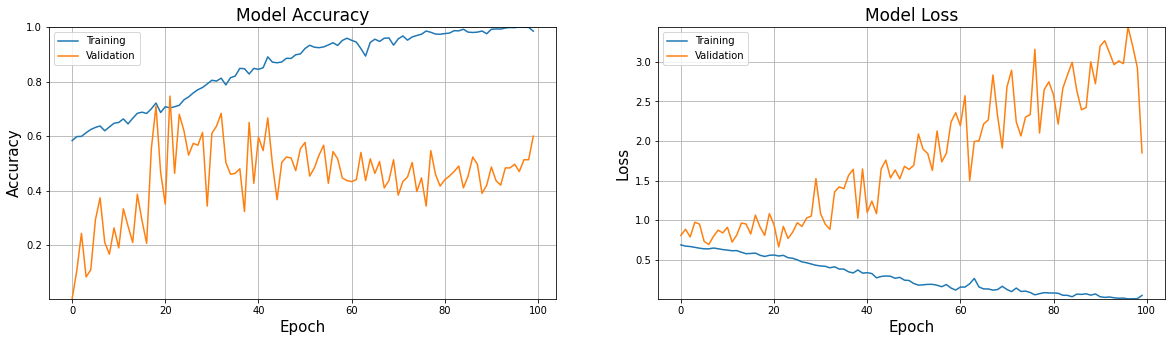

In [37]:
plot_performance(history=history1)

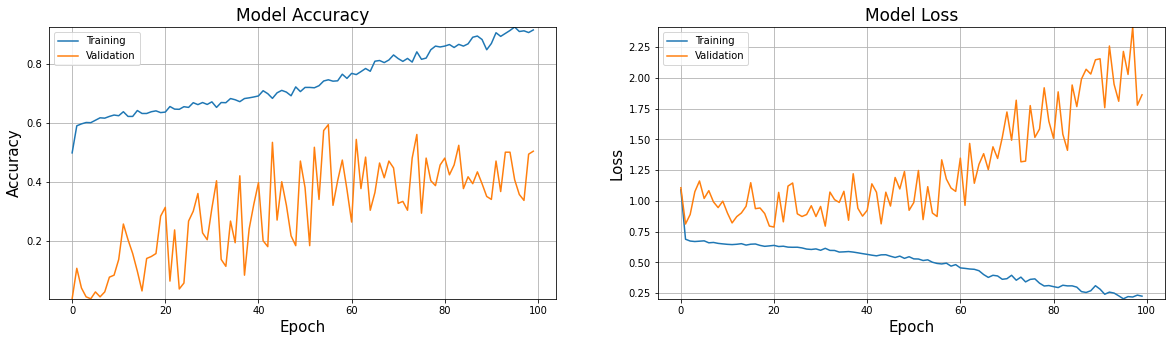

In [38]:
plot_performance(history=history2)

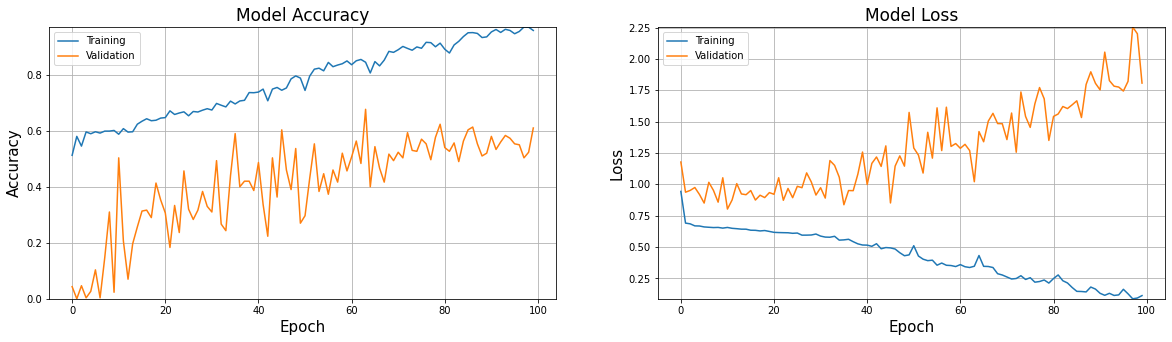

In [39]:
plot_performance(history=history3)

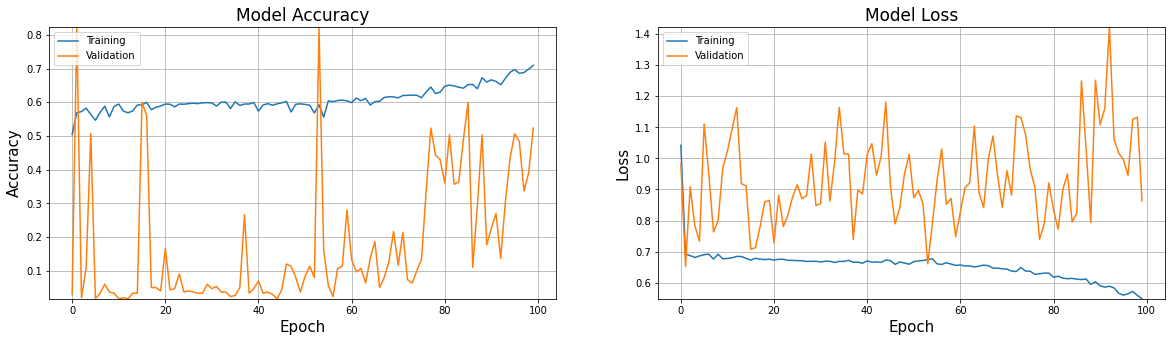

In [40]:
plot_performance(history=history4)